# Proyecto Marketing Bancario
---
Intergantes:

| Nombre | apellido |
| ---- | ---- |
| Melany Odet | Castañeda Bazaldúa |
| Genesis Guadalupe | Ibarra Iturbe |
| silvestre | Hernandez Hernandez |
| Alan Aarón | Martinez Celedonio |



## Datos de la actividad

### Descripción de Variables del Dataset de Marketing Bancario

Este dataset contiene datos de una campaña de marketing bancario, donde se recopiló información sobre interacciones con clientes con el objetivo de predecir la efectividad de las campañas y mejorar las estrategias futuras. Los datos ofrecen una visión comprensiva sobre las características de los clientes y su respuesta a las campañas de telemarketing, permitiendo a los analistas explorar y descubrir patrones que pueden mejorar la efectividad de las futuras acciones de marketing. El análisis de este dataset ayudará a responder preguntas clave como la influencia del perfil demográfico y financiero del cliente en su disposición a suscribir nuevos servicios bancarios.

- **Edad**: Edad del cliente.
- **Trabajo**: Tipo de trabajo del cliente (ej. 'admin.', 'technician', 'services', etc.).
- **Estado_Civil**: Estado civil del cliente (ej. 'married', 'single', 'divorced').
- **Educacion**: Nivel educativo del cliente (ej. 'primary', 'secondary', 'tertiary').
- **Default**: Indica si el cliente tiene crédito en mora ('yes', 'no').
- **Balance**: Saldo anual promedio, en euros.
- **Vivienda**: Indica si el cliente tiene un préstamo de vivienda ('yes', 'no').
- **Prestamo**: Indica si el cliente tiene un préstamo personal ('yes', 'no').
- **Contacto**: Tipo de comunicación de contacto utilizada (ej. 'telephone', 'cellular', 'unknown').
- **Dia**: Día del mes en que se realizó el último contacto.
- **Mes**: Mes del año en que se realizó el último contacto (ej. 'jan', 'feb', 'mar', etc.).
- **Duracion**: Duración del último contacto, en segundos.
- **Campania**: Número de contactos realizados durante esta campaña y para este cliente.
- **Pdias**: Número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior.
- **Anterior**: Número de contactos realizados antes de esta campaña y para este cliente.
- **Resultado_Anterior**: Resultado de la campaña de marketing anterior (ej. 'failure', 'nonexistent', 'success').
- **Deposito**: Indica si el cliente ha suscrito un depósito a plazo ('yes', 'no').

Importacion de librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Criterios a cumplir

### Datos cargados y Visualizados Correctamente

In [9]:
# Carga de datos
df = pd.read_csv('Marketing.csv')
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())


Primeras filas del dataset:
   Edad     Trabajo Estado_Civil  Educacion Default  Balance Vivienda  \
0    59      admin.      married  secondary      no     2343      yes   
1    56      admin.      married  secondary      no       45       no   
2    41  technician      married  secondary      no     1270      yes   
3    55    services      married  secondary      no     2476      yes   
4    54      admin.      married   tertiary      no      184       no   

  Prestamo Contacto  Dia  Mes  Duracion  Campania  Pdias  Anterior  \
0       no  unknown    5  may      1042         1     -1         0   
1       no  unknown    5  may      1467         1     -1         0   
2       no  unknown    5  may      1389         1     -1         0   
3       no  unknown    5  may       579         1     -1         0   
4       no  unknown    5  may       673         2     -1         0   

  Resultado_Anterior Deposito  
0            unknown      yes  
1            unknown      yes  
2            unk

### Exploración de Inicial de Datos

In [10]:
# 2. Exploración Inicial de Datos (5 puntos)
print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nNúmero de valores únicos por columna:")
print(df.nunique())


Estadísticas descriptivas:
               Edad       Balance           Dia      Duracion      Campania  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              Pdias      Anterior  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%     

### Limpieza de datos

In [11]:
# 3. Limpieza de Datos (5 puntos)
# Tratamiento de valores atípicos en 'Balance'
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['Balance'] = df['Balance'].clip(lower_bound, upper_bound)

print("\nValores atípicos en 'Balance' tratados")


Valores atípicos en 'Balance' tratados


### Transformación de Variables

In [12]:
# 4. Transformación de Variables (5 puntos)
df['Edad_Categoria'] = pd.cut(df['Edad'], bins=[0, 30, 50, 100], labels=['Joven', 'Adulto', 'Mayor'])
print("\nNueva variable 'Edad_Categoria' creada")


Nueva variable 'Edad_Categoria' creada


### Visualizaciones

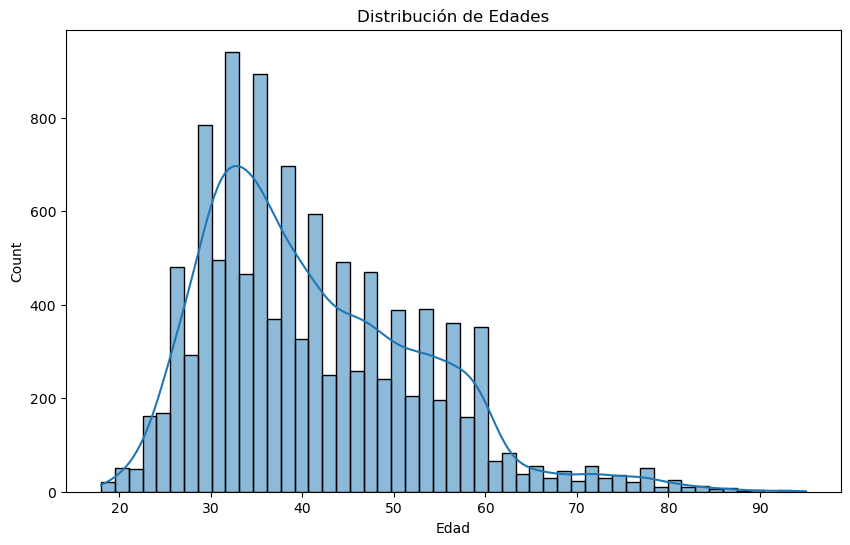

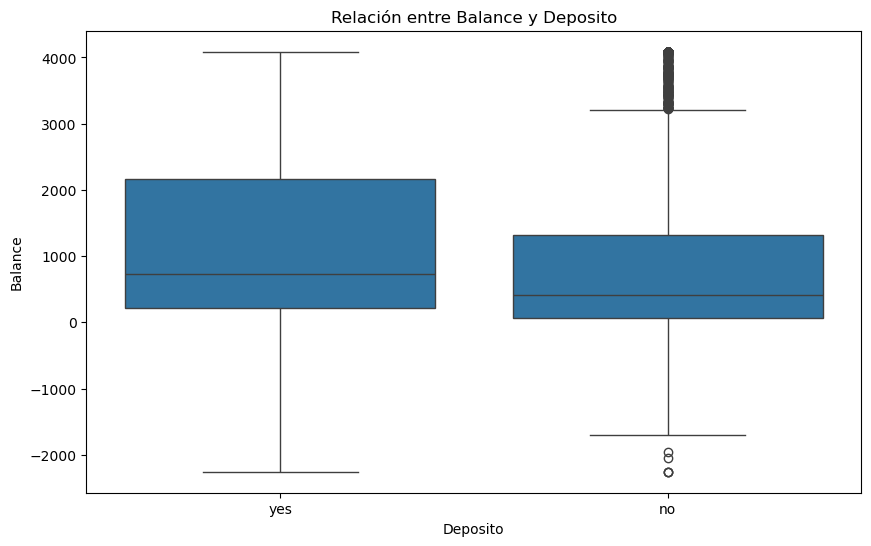

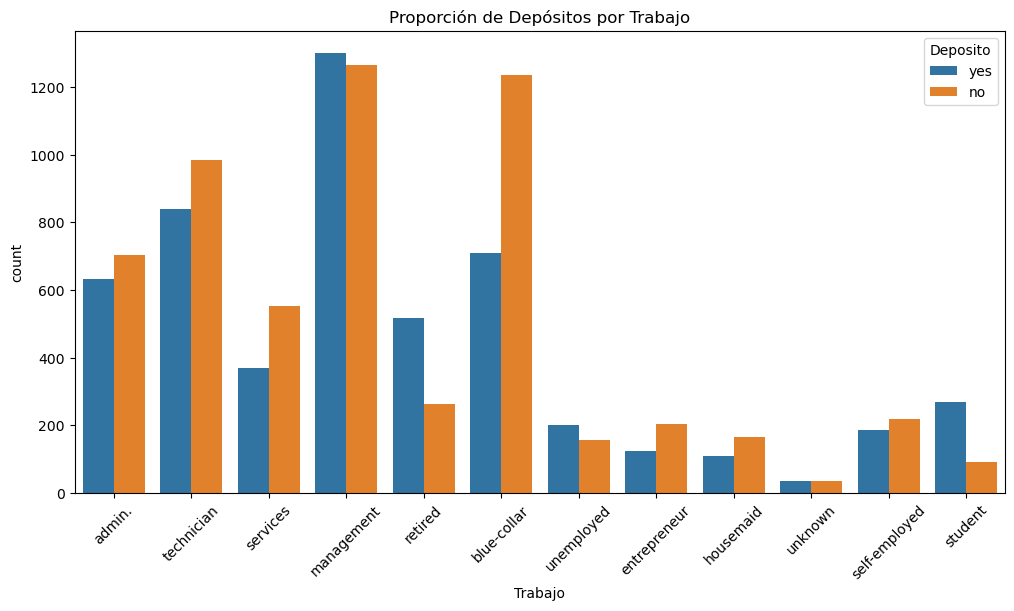

In [13]:
# 5. Visualizaciones (10 puntos)
plt.figure(figsize=(10, 6))
sns.histplot(df['Edad'], kde=True)
plt.title('Distribución de Edades')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Deposito', y='Balance', data=df)
plt.title('Relación entre Balance y Deposito')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Trabajo', hue='Deposito', data=df)
plt.title('Proporción de Depósitos por Trabajo')
plt.xticks(rotation=45)
plt.show()

### Correlaciones y Analisis Estadístico Básico

In [ ]:
# Código

### Selección y Creación de Nuevas Caracteristicas

In [ ]:
# Código

### Preparación de Datasets para Modelado

In [ ]:
# Código

### Selección de Algoritmos Adecuados

In [ ]:
# Código

### Implementación Correcta de Modelos

In [ ]:
# Código

### Evaluación del Modelo

In [ ]:
# Código

### Interpretación de Resultados

In [ ]:
# Código

### Conclusiones y recomendaciones

In [ ]:
# Código